#### Libraries

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.figure_factory as ff
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
df = pd.read_pickle('APOLLOTYRE-15minute-Hist')
df = pd.DataFrame(df)
df['date'] = df['date'].apply(pd.to_datetime)
df.set_index('date',inplace=True)


## Dataset

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(['date','open','high','low','close','volume']),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.index,df.open, df.high, df.low, df.close,df.volume],
               fill_color='lavender',
               align='left'))
])

fig.show()

### So basically this dataset contains 6 different features i.e. date, open, high, low, close, volume

### Date - This contains date + time at the instant of trade

### Open - Open is the price when the stock began

### High - Maximum price at the given time period

### Low - Minimum price at the given time period

### Close - Price at which stock ended

### Volume - It is the total amount of trading activity

### Incase of our data the time period is 15 minutes

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

fig = make_subplots(rows=4, cols=1,subplot_titles=('Open','High','Low','Close'))

fig.add_trace(
    Line(x=df.index, y=df.open),
    row=1, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.high),
    row=2, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.low),
    row=3, col=1
)

fig.add_trace(
    go.Line(x=df.index, y=df.close),
    row=4, col=1
)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()


## Visualizing Patterns in the Data

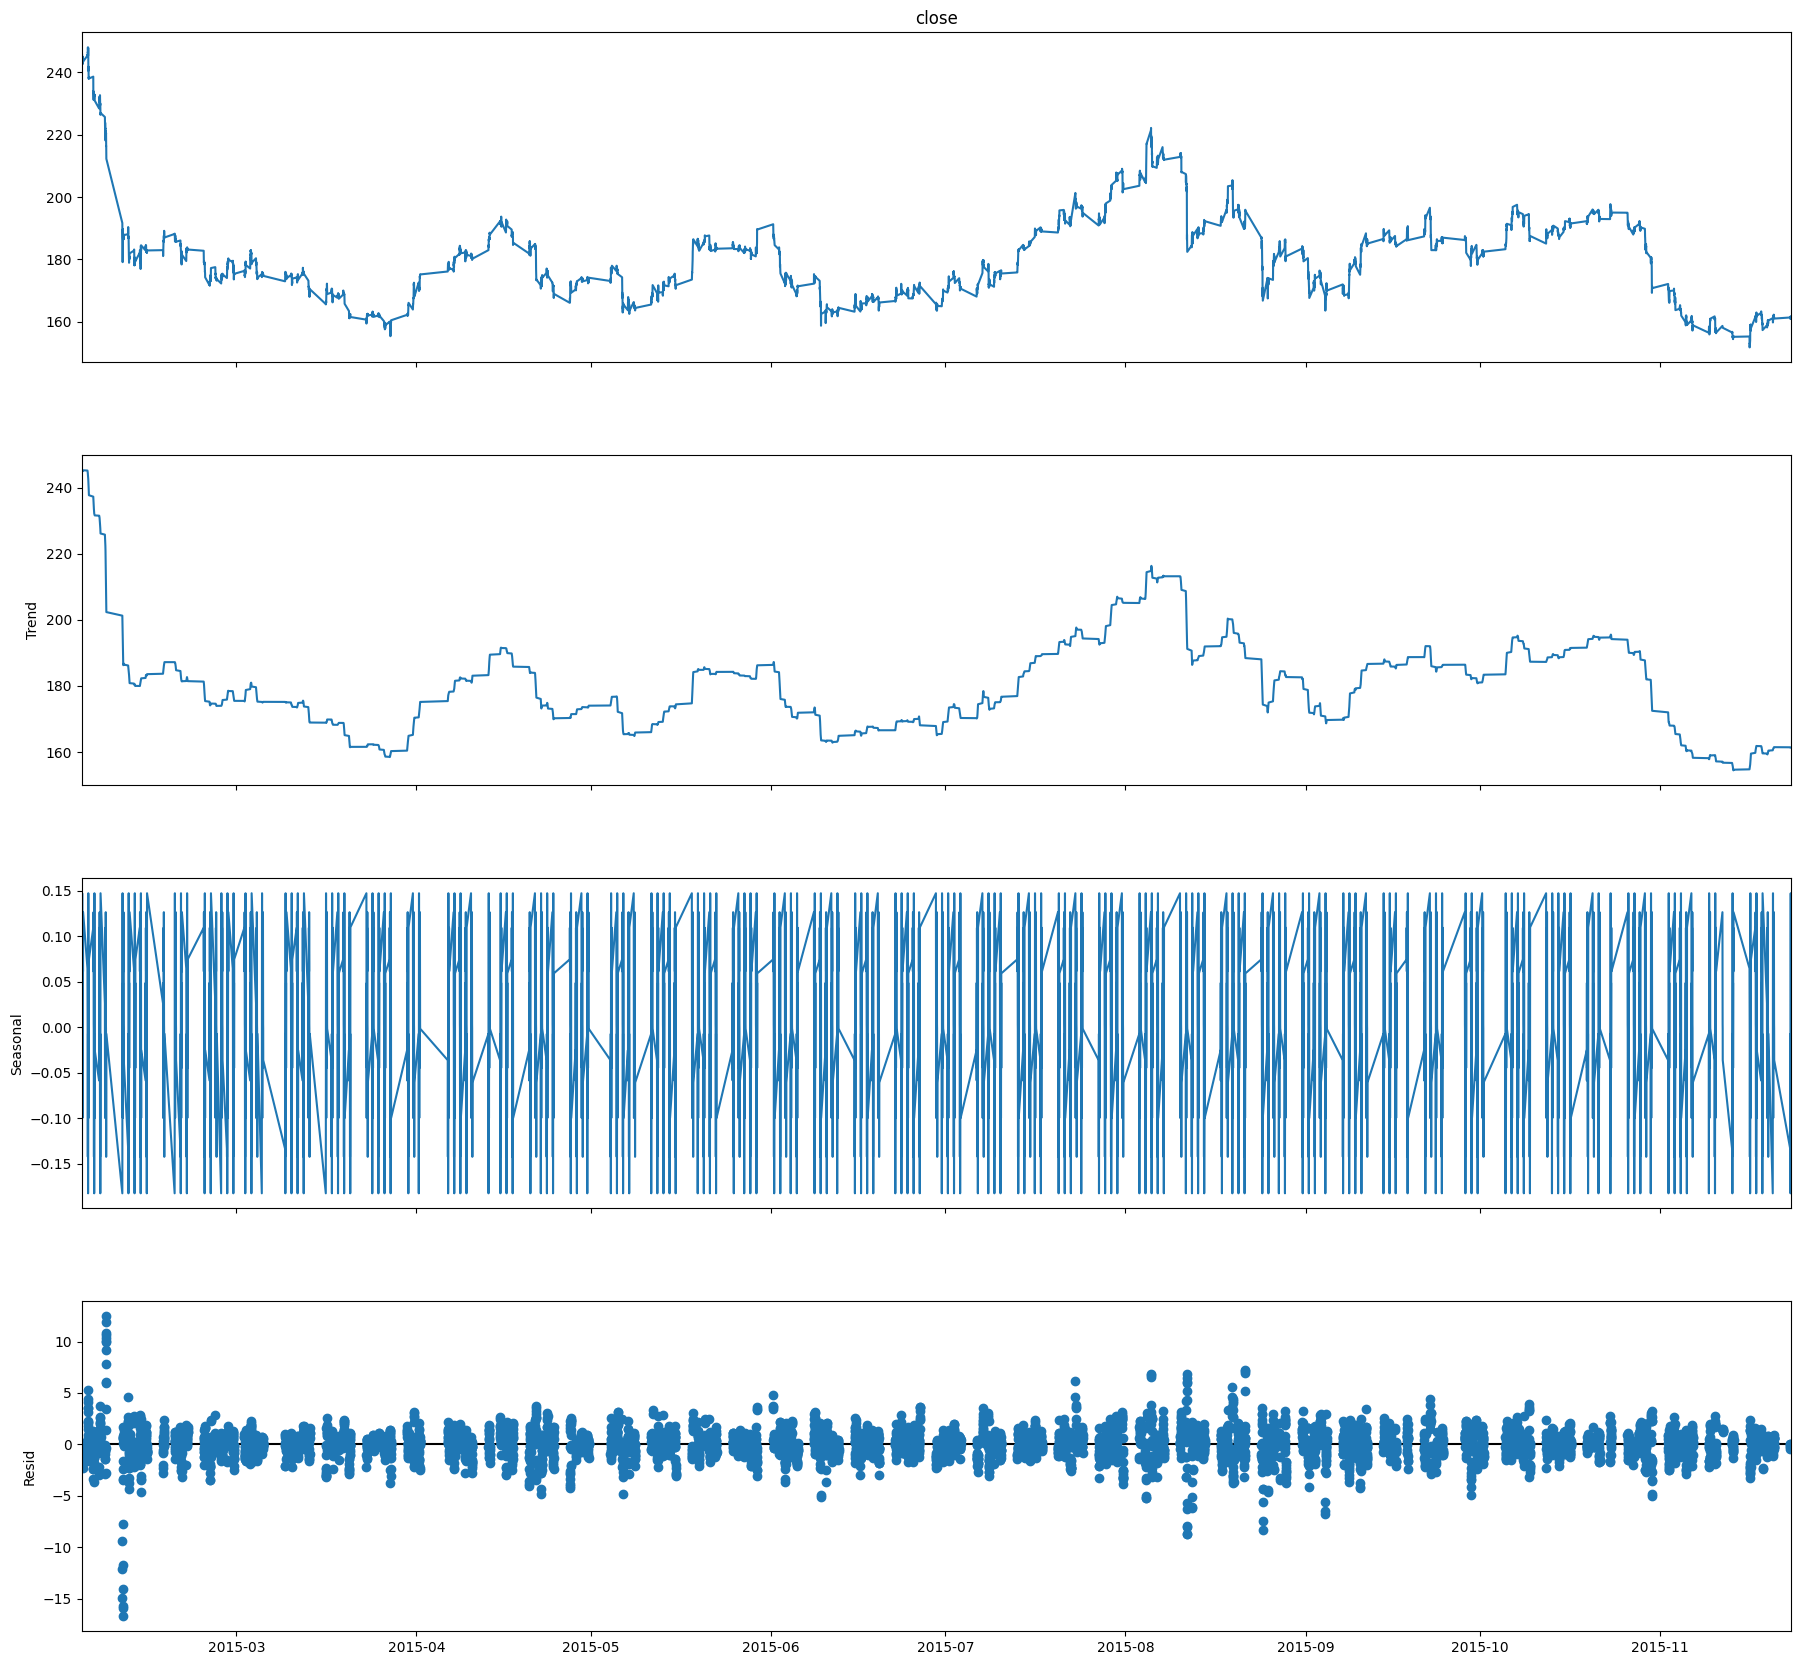

In [ ]:

result = seasonal_decompose(df.close.head(5000), model='additive', period = 30)
fig = go.Figure()
fig = result.plot()
fig.set_size_inches(20, 19)

## Candlestick

* Candlestick charts are used by traders to determine possible price movement based on past patterns.

* Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies.

* Many algorithms are based on the same price information shown in candlestick charts.

* Trading is often dictated by emotion, which can be read in candlestick charts.

<img src="https://alpari.com/storage/inline-images/Forex%20candlestick%20patterns%20and%20how%20to%20use%20them%20-%201_0.png">


## Sample Candlesticks

#### We can see 5 different types of candlesticks below.

In [ ]:
open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1]
dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10)]

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data,
               increasing_line_color= 'green', decreasing_line_color= 'red')])

fig.show()

# Candlestick chart


In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime


fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()

# Creating Train Test Data

In [ ]:
new_df = pd.DataFrame()
new_df = df['close']
new_df.index = df.index

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_df.values

train_data=final_dataset[0:20000,]
valid_data=final_dataset[20000:,]




In [ ]:
train_df = pd.DataFrame()
valid_df = pd.DataFrame()
train_df['Close'] = train_data
train_df.index = new_df[0:20000].index
valid_df['Close'] = valid_data
valid_df.index = new_df[20000:].index


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset.reshape(-1,1))

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

# Long Short Term Memory Networks(LSTM)

Do you think about everything from scratch. No. You perform the actions based on your past memory. For example if you are reading a newspaper, you understand words because in your past you have read them and they are stored in your memory. If you encounter a new word then it gets stored in your memory newly. So the question is Do you want your model to process everything from scratch? Or you want to make it more intelligent by creating a memory space. Thats when LSTM comes into the game. LSTM which is long short term memory is the type of RNN which can hold memory for longer period of time. They are a good fit for time series preditiction, or forecasting problems.


In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_df[len(new_df)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

lstm_model.summary()

19940/19940 - 706s - loss: 2.5223e-04 - 706s/epoch - 35ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

197/197 [==============================] - 10s 43ms/step


In [ ]:
valid_df['Predictions']=predicted_closing_price

# Predictions

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index,y=train_df['Close'],
                    mode='lines',
                    name='Trained Data'))
fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Close'],
                    mode='lines',
                    name='Valid Data'))
fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Predictions'],
                    mode='lines',
                    name='Predictions'))

In [ ]:
from sklearn.metrics import mean_squared_error
print('The Mean Squared Error is',mean_squared_error(valid_df['Close'].values,valid_df['Predictions'].values))

The Mean Squared Error is 1.1388570114236234


# Let's have a closer look

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Close'],
                    mode='lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Predictions'],
                    mode='lines',
                    name='Predicted'))